#  Support-vector machine

**"A supervised learning technique that pays attention only to the points that are most difficult to tell apart"**



## Pregled
* SVM
* TensorFlow implementacija

## SVM
- Još jedan supervised learning algoritam za klasifikaciju
- Pre neuralnih mreža najkorišćeniji algoritam klasifikacije

**Hard margin SVM**
- Pretpostavka: tačke su linearno separabilne
- Intuicija: fokusiramo se samo na tačke koje je najteže klasifikovati (nasuprot perceptronu koji se fokusira na sve)
  - Te tačke su "support vectors" i određuju decision boundary
  - Dobijamo na neki način "optimalan" decision boundary a ne bilo koji
- Decision boundary je prava $WX+b=0$, gde je $W$ matrica težina koju želimo da naučimo a $b$ bias
- Želimo da za sve tačke u pozitivnoj klasi važi $Wx+b\ge1$ a za sve tačke u negativnoj $Wx+b\le-1$
  - Large margin
- Takođe želimo da prostor između $Wx+b=-1$ i $Wx+b=1$ bude što veći (maksimizujemo $\frac{2}{||w||}$)
- Ovo nas dovodi do problema kvadratne optimizacije, koji može da se reši pretvaranjem u dualni problem (metodom Lagranžovih duala) a zatim gradijentnim spustom (ili samo gradijentnim spustom u originalnoj postavci)
- Dobijene težine su nula za većinu tačaka (osim za support vektore)

**Soft margin SVM**
- Ako tačke nisu linearno separabilne (češći slučaj u praksi) dodajemo "slack" promenljive koje olakšavaju naše uslove
- Sada $WX+b\ge1-\xi_i$ i minimizujemo $\frac{2}{||w||}+C\sum{\xi_i}$

**Kernel trick**
- SVM je do sada bio linearan model, tj. nalazi linearnu hiperravan koja razdvaja podatke
- Kernel trick je metoda kojom možemo dobiti proizvoljno kompleksan decision boundary
- Uvodimo funkciju $\phi$ koja mapira feature prostor u feature prostor veće dimenzije
- Sada u tom prostoru linearno razdvojimo podatke
  - Što zapravo predstavlja nelinearan decision boundary u originalnom prostoru
- $\phi(x)$ zapravo nikada nemamo eksplicitno 
  - Umesto toga imamo skalarni proizvod u novom prostoru: $K(x, z) = \phi(x)^T\phi(z)$
  - **Kernel**, mera sličnosti dva vektora
- Ovo nazivamo "kernelizacija" i koristan je trik i za druge machine learning modele (ali se najčešće koristi kod SVM)
- Gausov kernel: $K(x, z) = \exp(-\frac{||x-z||^2}{2\sigma^2})$
- Nije svaki kernel validan, da bi bio validan (tj. da bi postojala odgovarajuća transformacija $\phi$) mora da zadovoljava uslove [Mercerove teoreme](https://en.wikipedia.org/wiki/Mercer%27s_theorem)



## Resursi

[Dobar pregled formula i dodatni linkovi (2. odgovor)](https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work)

[cs229 beleške](http://cs229.stanford.edu/notes/cs229-notes3.pdf)

[Još jedna kvalitetna prezentacija](http://www.svms.org/tutorials/Berwick2003.pdf)


## TF implementacija
Hinge loss sa regularizacijom: $ \frac{1}{2} \| w \|_{2}^{2} + C\sum_{i=1}^{m} \max \big(0, 1 - y^{(i)} (w^{T}x^{(i)} + b) \big)$

W0614 21:33:27.857277 140071285237632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loss:  15.218657
Loss:  12.286267
Loss:  12.858364
Loss:  10.257169
Loss:  10.574211
Loss:  8.297718
Loss:  8.371741
Loss:  6.4148064
Loss:  6.332777
Loss:  4.623044
Loss:  4.425698
Loss:  3.3689961
Loss:  3.3629684
Loss:  3.1301367
Loss:  3.33987
Loss:  3.0817244
Loss:  3.0861208
Loss:  2.8992105
Loss:  3.0159378
Loss:  2.8370686
Loss:  2.9885445
Loss:  2.821137
Loss:  2.8558958
Loss:  2.7301645
Loss:  2.8108869
Loss:  2.7133744
Loss:  2.749757
Loss:  2.678176
Loss:  2.6906245
Loss:  2.632007
Loss:  2.6687536
Loss:  2.6190703
Loss:  2.5786355
Loss:  2.5470471
Loss:  2.5685914
Loss:  2.528392
Loss:  2.5438905
Loss:  2.5300808
Loss:  2.4530969
Loss:  2.4512498
Loss:  2.4114609
Loss:  2.423444
Loss:  2.3672469
Loss:  2.4019392
Loss:  2.3199651
Loss:  2.3856962
Loss:  2.2915545
Loss:  2.373718
Loss:  2.3178372
Loss:  2.3550603
Loss:  2.285362
Loss:  2.3282232
Loss:  2.2162082
Loss:  2.3148928
Loss:  2.1909604
Loss:  2.3036954
Loss:  2.168827
Loss:  2.2907193
Loss:  2.1467676
Loss:  2.2813

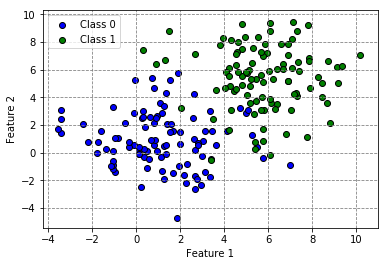

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.reset_default_graph()

# Ucitavanje podataka
data = np.loadtxt('logreg_data.csv', delimiter=',')

# Trazimo primere sa klasom 0
idx = data[:, 2] == 0.0

# Plotujemo dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx][:, 0], data[idx][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[~idx][:,0], data[~idx][:,1], c='g', edgecolors='k', label='Class 1')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

# Podela na x i y
x_data = data[:, :2]
y_data = data[:, 2].reshape(len(data), 1)

# Pretvaramo labelu 0 u -1 zbog formulacije SVM
y_data[y_data==0] = -1

# Parametri
train_size = len(data)
num_features = 2
num_labels = 1

C = 0.1
num_epochs = 100
batch_size = 100
learning_rate = 0.01

# Model
X = tf.placeholder(tf.float32, [None, num_features], "X")
y = tf.placeholder(tf.float32, [None, num_labels], "y")
W = tf.Variable(tf.random_normal([num_features, num_labels]))
b = tf.Variable(tf.random_normal([num_labels]))

hyp = tf.add(tf.matmul(X, W), b)

# Loss
regularization_loss = 0.5 * tf.reduce_sum(tf.square(W)) 
hinge_loss = tf.reduce_sum(tf.maximum(tf.zeros([batch_size, 1]),  1 - y * hyp))
svm_loss = regularization_loss + C * hinge_loss

opt_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(svm_loss)

# Evaluacija

predicted_class = tf.sign(hyp)  # vece ili manje od nula
correct_prediction = tf.equal(y, predicted_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Trening

with tf.Session() as sess:
    
  sess.run(tf.global_variables_initializer())

  for step in range(num_epochs * train_size // batch_size):

    # Izdvajanje trenutnog batch-a
    offset = (step * batch_size) % train_size
    batch_data = x_data[offset:(offset + batch_size), :]
    batch_labels = y_data[offset:(offset + batch_size)]

    opt_op.run(feed_dict={X: batch_data, y: batch_labels})

    print('Loss: ', svm_loss.eval(feed_dict={X: batch_data, y: batch_labels}))

  print("Accuracy na trening setu:", accuracy.eval(feed_dict={X: x_data, y: y_data}))
  W_computed, b_computed = W.eval(), b.eval()
